<a href="https://www.kaggle.com/code/asiyatshchamkhalova/booking-project?scriptVersionId=125999930" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# импортируем библиотеки для визуализации
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

# Загружаем специальный удобный инструмент для разделения датасета:
from sklearn.model_selection import train_test_split

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sf-booking/hotels_test.csv
/kaggle/input/sf-booking/hotels_train.csv
/kaggle/input/sf-booking/submission.csv


# Начало работы и подгрузка данных

In [2]:
# всегда фиксируйте RANDOM_SEED, чтобы ваши эксперименты были воспроизводимы!
RANDOM_SEED = 42

In [3]:
# зафиксируем версию пакетов, чтобы эксперименты были воспроизводимы:
!pip freeze > requirements.txt

In [4]:
# Подгрузим наши данные из соревнования

DATA_DIR = '/kaggle/input/sf-booking/'
df_train = pd.read_csv(DATA_DIR+'/hotels_train.csv') # датасет для обучения
df_test = pd.read_csv(DATA_DIR+'hotels_test.csv') # датасет для предсказания
sample_submission = pd.read_csv(DATA_DIR+'/submission.csv') # самбмишн

Посмотрим на данные.

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386803 entries, 0 to 386802
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               386803 non-null  object 
 1   additional_number_of_scoring                386803 non-null  int64  
 2   review_date                                 386803 non-null  object 
 3   average_score                               386803 non-null  float64
 4   hotel_name                                  386803 non-null  object 
 5   reviewer_nationality                        386803 non-null  object 
 6   negative_review                             386803 non-null  object 
 7   review_total_negative_word_counts           386803 non-null  int64  
 8   total_number_of_reviews                     386803 non-null  int64  
 9   positive_review                             386803 non-null  object 
 

In [6]:
df_train.head(2)

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,tags,days_since_review,lat,lng
0,Stratton Street Mayfair Westminster Borough Lo...,581,2/19/2016,8.4,The May Fair Hotel,United Kingdom,Leaving,3,1994,Staff were amazing,4,7,10.0,"[' Leisure trip ', ' Couple ', ' Studio Suite ...",531 day,51.507894,-0.143671
1,130 134 Southampton Row Camden London WC1B 5AF...,299,1/12/2017,8.3,Mercure London Bloomsbury Hotel,United Kingdom,poor breakfast,3,1361,location,2,14,6.3,"[' Business trip ', ' Couple ', ' Standard Dou...",203 day,51.521009,-0.123097


In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128935 entries, 0 to 128934
Data columns (total 16 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               128935 non-null  object 
 1   additional_number_of_scoring                128935 non-null  int64  
 2   review_date                                 128935 non-null  object 
 3   average_score                               128935 non-null  float64
 4   hotel_name                                  128935 non-null  object 
 5   reviewer_nationality                        128935 non-null  object 
 6   negative_review                             128935 non-null  object 
 7   review_total_negative_word_counts           128935 non-null  int64  
 8   total_number_of_reviews                     128935 non-null  int64  
 9   positive_review                             128935 non-null  object 
 

In [8]:
df_test.head(2)

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,tags,days_since_review,lat,lng
0,Via Senigallia 6 20161 Milan Italy,904,7/21/2017,8.1,Hotel Da Vinci,United Kingdom,Would have appreciated a shop in the hotel th...,52,16670,Hotel was great clean friendly staff free bre...,62,1,"[' Leisure trip ', ' Couple ', ' Double Room '...",13 days,45.533137,9.171102
1,Arlandaweg 10 Westpoort 1043 EW Amsterdam Neth...,612,12/12/2016,8.6,Urban Lodge Hotel,Belgium,No tissue paper box was present at the room,10,5018,No Positive,0,7,"[' Leisure trip ', ' Group ', ' Triple Room ',...",234 day,52.385649,4.834443


In [9]:
sample_submission.head(2)

,reviewer_score,id
0,1,488440
1,10,274649


In [10]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128935 entries, 0 to 128934
Data columns (total 2 columns):
 #   Column          Non-Null Count   Dtype
---  ------          --------------   -----
 0   reviewer_score  128935 non-null  int64
 1   id              128935 non-null  int64
dtypes: int64(2)
memory usage: 2.0 MB


# Очистка данных

Избавимся от дубликатов в тренировочном датафрейме.

In [11]:
all_columns = list(df_train.columns) 
df_train_duplicates = df_train[df_train.duplicated(subset=all_columns)]
print(f'Число дубликатов: {df_train_duplicates.shape[0]}')
df_train.drop_duplicates(inplace=True, ignore_index=True) # Очистим тренировочный датафрейм

Число дубликатов: 307


Посмотрим на числовые признаки.

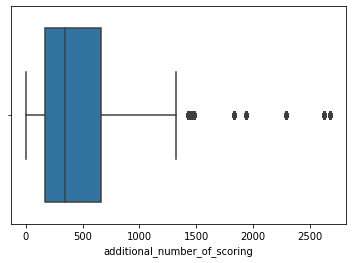

In [12]:
# Мы будем строить коробчатые диаграммы числовых признаков в тренировочном датафрейме
sns.boxplot(data=df_train, x='additional_number_of_scoring'); # признак "число оценок без проверки"

In [13]:
# Избавимся от явных выбросов
df_train = df_train[df_train['additional_number_of_scoring'] < 1400]

count    364336.000000
mean          8.413416
std           0.538125
min           5.200000
25%           8.100000
50%           8.400000
75%           8.800000
max           9.800000
Name: average_score, dtype: float64

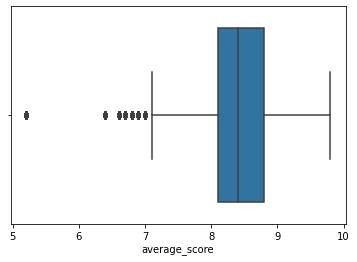

In [14]:
display(df_train['average_score'].describe()) # перейдем к следующему признаку
sns.boxplot(data=df_train, x='average_score');

На диаграмме вы видим выбросы. Однако данный признак указывает на средний балл отеля, по десятибальной шкале все оценки адекватны.

count    364336.000000
mean         18.397666
std          29.592586
min           0.000000
25%           0.000000
50%           9.000000
75%          23.000000
max         408.000000
Name: review_total_negative_word_counts, dtype: float64

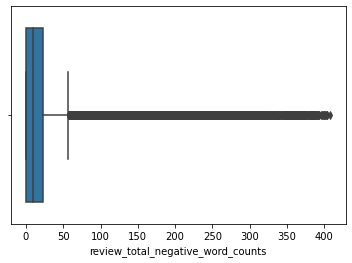

In [15]:
display(df_train['review_total_negative_word_counts'].describe())
sns.boxplot(data=df_train, x='review_total_negative_word_counts'); # признак "число слов в негативном отзыве"

В признаках количества слов позитивной и негативной оценки мы ничего трогать не будем, так как размер комментария в 400 слов кажется вполне реальным.

count    364336.000000
mean         17.993479
std          21.925300
min           0.000000
25%           6.000000
50%          11.000000
75%          23.000000
max         395.000000
Name: review_total_positive_word_counts, dtype: float64

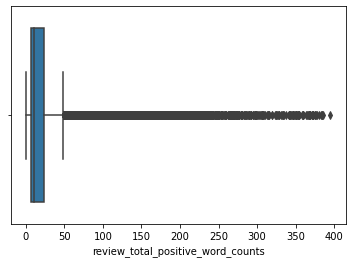

In [16]:
display(df_train['review_total_positive_word_counts'].describe())
sns.boxplot(data=df_train, x='review_total_positive_word_counts'); # признак "число слов в позитивном отзыве"

count    364336.000000
mean       2424.099993
std        1890.077179
min          43.000000
25%        1110.000000
50%        1966.000000
75%        3224.000000
max       16670.000000
Name: total_number_of_reviews, dtype: float64

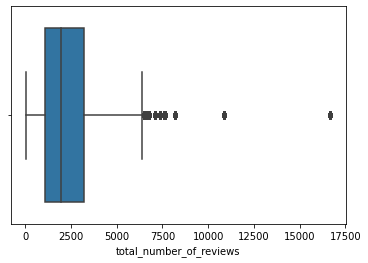

In [17]:
display(df_train['total_number_of_reviews'].describe())
sns.boxplot(data=df_train, x='total_number_of_reviews'); # признак "общее число отзывов об отеле"

В признаке "общее количество отзывов об отеле" наблюдаются подозрительные величины. Избавимся от них.

In [18]:
df_train = df_train[df_train['total_number_of_reviews'] < 10000]

count    362081.000000
mean          7.266537
std          11.152286
min           1.000000
25%           1.000000
50%           3.000000
75%           9.000000
max         355.000000
Name: total_number_of_reviews_reviewer_has_given, dtype: float64

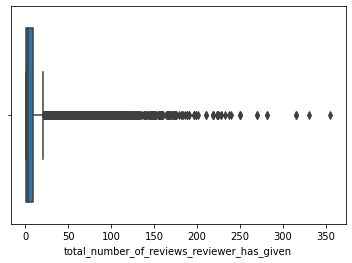

In [19]:
display(df_train['total_number_of_reviews_reviewer_has_given'].describe())
sns.boxplot(data=df_train, x='total_number_of_reviews_reviewer_has_given'); # признак "число отзывов пользователя"

Признак "общее число оценок пользователя" вызывает сомнения. Попробуем избавиться от наиболее оторванных от реальности величин.

In [20]:
df_train = df_train[df_train['total_number_of_reviews_reviewer_has_given'] < 250]

# Обработка признаков и создание новых

In [21]:
# ВАЖНО! дря корректной обработки признаков объединяем трейн и тест в один датасет
df_train['sample'] = 1 # помечаем где у нас трейн
df_test['sample'] = 0 # помечаем где у нас тест
df_test['reviewer_score'] = 0 # в тесте у нас нет значения reviewer_score, мы его должны предсказать, по этому пока просто заполняем нулями

data = df_test.append(df_train, sort=False).reset_index(drop=True) # объединяем

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491005 entries, 0 to 491004
Data columns (total 18 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               491005 non-null  object 
 1   additional_number_of_scoring                491005 non-null  int64  
 2   review_date                                 491005 non-null  object 
 3   average_score                               491005 non-null  float64
 4   hotel_name                                  491005 non-null  object 
 5   reviewer_nationality                        491005 non-null  object 
 6   negative_review                             491005 non-null  object 
 7   review_total_negative_word_counts           491005 non-null  int64  
 8   total_number_of_reviews                     491005 non-null  int64  
 9   positive_review                             491005 non-null  object 
 

In [23]:
data['hotel_address'] # посмотрим на признак "адрес отеля"

0                        Via Senigallia 6 20161 Milan Italy
1         Arlandaweg 10 Westpoort 1043 EW Amsterdam Neth...
2               Mallorca 251 Eixample 08008 Barcelona Spain
3         Piazza Della Repubblica 17 Central Station 201...
4         Singel 303 309 Amsterdam City Center 1012 WJ A...
                                ...                        
491000    9 Knaresborough Place Kensington and Chelsea L...
491001    Landstra er Hauptstra e 155 03 Landstra e 1030...
491002    29 31 Gower Street Camden London WC1E 6HG Unit...
491003    31 Great Cumberland Place Westminster Borough ...
491004    25 Courtfield Gardens Kensington and Chelsea L...
Name: hotel_address, Length: 491005, dtype: object

Из адреса мы получим два новых признака: страна и город.

In [24]:
def get_country(x): # функция для идентификации страны
    if 'France' in x:
        return 'France'
    elif 'United Kingdom' in x:
        return 'United Kingdom'
    elif 'Italy' in x:
        return 'Italy'
    elif 'Austria' in x:
        return 'Austria'
    elif 'Spain' in x:
        return 'Spain'
    elif 'Netherlands' in x:
        return 'Netherlands'

data['country'] = data['hotel_address'].apply(get_country) # создаем новый признак

In [25]:
data['country'].value_counts()

United Kingdom    240135
Spain              60149
France             59625
Netherlands        57209
Austria            38937
Italy              34950
Name: country, dtype: int64

Сразу закодируем признак страны.

In [26]:
data = pd.get_dummies(data, columns=['country']) #  выбираем one-hot encoding

In [27]:
def get_city(x): # аналогичную функцию создаем для получения признака "город"
    if 'Paris' in x:
        return 'Paris'
    elif 'London' in x:
        return 'London'
    elif 'Amsterdam' in x:
        return 'Amsterdam'
    elif 'Vienna' in x:
        return 'Vienna'
    elif 'Barcelona' in x:
        return 'Barcelona'
    elif 'Milan' in x:
        return 'Milan'

data['city'] = data['hotel_address'].apply(get_city)

In [28]:
data['city'].value_counts()

London       240135
Barcelona     60149
Paris         59625
Amsterdam     57209
Vienna        38937
Milan         34950
Name: city, dtype: int64

Кодируем его аналогично.

In [29]:
data = pd.get_dummies(data, columns=['city'])

In [30]:
data.info() # убеждаемся, что все идет по плану

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491005 entries, 0 to 491004
Data columns (total 30 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               491005 non-null  object 
 1   additional_number_of_scoring                491005 non-null  int64  
 2   review_date                                 491005 non-null  object 
 3   average_score                               491005 non-null  float64
 4   hotel_name                                  491005 non-null  object 
 5   reviewer_nationality                        491005 non-null  object 
 6   negative_review                             491005 non-null  object 
 7   review_total_negative_word_counts           491005 non-null  int64  
 8   total_number_of_reviews                     491005 non-null  int64  
 9   positive_review                             491005 non-null  object 
 

В некоторых адресах отелей указано, что отель находится в центре. Создадим отдельный признак для этой информации.

In [31]:
data['center'] = data['hotel_address'].apply(lambda x: 1 if 'Center' in x else 0) # отель или в центре, или нет

In [32]:
data['center'].value_counts()

0    452725
1     38280
Name: center, dtype: int64

Переходим к следующему признаку типа object - "время публикации отзыва". 

In [33]:
data['review_date'] = pd.to_datetime(data['review_date']) # Изменим тип данных на более адекватный

Из признака даты мы получим три новых признака: месяц, год, день недели. Посмотрим, окажутся ли они значимы для нашей модели.

In [34]:
data['month'] = data['review_date'].dt.month
data['year'] = data['review_date'].dt.year
data['day_of_week'] = data['review_date'].dt.dayofweek

In [35]:
data.head(2)

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,...,city_Amsterdam,city_Barcelona,city_London,city_Milan,city_Paris,city_Vienna,center,month,year,day_of_week
0,Via Senigallia 6 20161 Milan Italy,904,2017-07-21,8.1,Hotel Da Vinci,United Kingdom,Would have appreciated a shop in the hotel th...,52,16670,Hotel was great clean friendly staff free bre...,...,0,0,0,1,0,0,0,7,2017,4
1,Arlandaweg 10 Westpoort 1043 EW Amsterdam Neth...,612,2016-12-12,8.6,Urban Lodge Hotel,Belgium,No tissue paper box was present at the room,10,5018,No Positive,...,1,0,0,0,0,0,0,12,2016,0


Следующий признак - "название отеля". 

In [36]:
data['hotel_name'].value_counts()

Grand Royale London Hyde Park     2958
Holiday Inn London Kensington     2768
Intercontinental London The O2    2551
Park Grand Paddington Court       2288
Park Plaza County Hall London     2223
                                  ... 
Hotel Daniel Paris                  12
Le Lavoisier                        12
Hotel Wagner                        10
Mercure Paris Porte d Orleans       10
Hotel Gallitzinberg                  8
Name: hotel_name, Length: 1492, dtype: int64

Судя по всему, многие отели из наших данных относятся к известным сетям: Hilton, Ritz и так далее. Создадим отдельный признак для этого параметра.

In [37]:
def famous_chains(x): # функция для поиска названий известных сетей
    if 'Mercure' in x:
        return 'Mercure'
    elif 'Hilton' in x:
        return 'Hilton'
    elif 'Ritz' in x:
        return 'Ritz'
    elif 'Hyatt' in x:
        return 'Hyatt'
    elif 'Four Seasons' in x:
        return 'Four Seasons'
    elif 'Ritz' in x:
        return 'Ritz'
    elif 'Holiday Inn' in x:
        return 'Holiday Inn'
    elif 'Novotel' in x:
        return 'Novotel'
    elif 'Radisson' in x:
        return 'Radisson'
    else:
        return 'Other'
    
data['famous_chain'] = data['hotel_name'].apply(famous_chains)
data['famous_chain'].value_counts()

    

Other           410804
Hilton           29421
Holiday Inn      15874
Radisson         11250
Mercure          10422
Novotel           9838
Hyatt             1933
Ritz              1207
Four Seasons       256
Name: famous_chain, dtype: int64

In [38]:
data[data['famous_chain'] == 'Other']['hotel_name'].head() # посмотрим на названия отелей, которые не являются сетевыми

0                   Hotel Da Vinci
1                Urban Lodge Hotel
3         Hotel Principe Di Savoia
4                   Hotel Esther a
8    Hotel Saint Petersbourg Opera
Name: hotel_name, dtype: object

Кажется, из названий больше ничего интересного не получить. Закодируем новый признак.

In [39]:
data = pd.get_dummies(data, columns=['famous_chain']) # используем one-hot encoding

Следующий object признак - гражданство ревьюера. 

In [40]:
data['reviewer_nationality'].value_counts() # посмотрим поближе

 United Kingdom               228953
 United States of America      34630
 Australia                     21043
 Ireland                       14060
 United Arab Emirates           9907
                               ...  
 Cape Verde                        1
 Wallis and Futuna                 1
 Svalbard Jan Mayen                1
 Northern Mariana Islands          1
 Vatican City                      1
Name: reviewer_nationality, Length: 226, dtype: int64

Значений очень много - 226, так что закодируем признак через binary encoding.

In [41]:
import category_encoders as ce
bin_encoder = ce.BinaryEncoder(cols=['reviewer_nationality']) 
type_bin = bin_encoder.fit_transform(data['reviewer_nationality'])
data = pd.concat([data, type_bin], axis=1) # обновляем датафрейм 

Переходим к очень важном признаку - "негативный отзыв". 

In [42]:
data['negative_review'].value_counts().nlargest(40)

No Negative                  123049
 Nothing                      13728
 Nothing                       4082
 nothing                       2151
 N A                            983
 None                           944
                                829
 N a                            488
 Breakfast                      382
 Small room                     365
 Location                       349
 Nothing really                 304
 All good                       304
 none                           296
 Everything                     295
 nothing                        276
 No complaints                  265
 Price                          253
 Nil                            242
 Nothing really                 234
 Nothing at all                 214
 n a                            213
 Nothing to dislike             194
 Small rooms                    188
 Nothing at all                 185
 None                           178
 No complaints                  170
 All good                   

Попытаемся получить максимум полезных признаков благодаря поиску слов и выражений.

In [43]:
def no_negative(x): # функция для поиска отзывов без негатива
    neg_list = ['No Negative', 'Nothing', 'nothing', 'N A', 'N a', 'None', 'good', 'none', 'great', 'NA', 'No complaints']
    for i in neg_list:
        if i in x:
            return 1  
    return 0
    
data['no_negative'] = data['negative_review'].apply(no_negative) # создаем новый признак

In [44]:
data['no_negative'].value_counts()

0    301829
1    189176
Name: no_negative, dtype: int64

In [45]:
data[data['no_negative'] == 0]['negative_review'].value_counts() # теперь посмотрим на жалобы в отзывах

                                                                                                                                                                                          829
 Breakfast                                                                                                                                                                                382
 Small room                                                                                                                                                                               365
 Location                                                                                                                                                                                 349
 Everything                                                                                                                                                                               295
                                                  

In [46]:
data['everything_bad'] = data['negative_review'].apply(lambda x: 1 if 'everything' in x else 0)
data['everything_bad'].value_counts() # признак "все плохо"

0    485318
1      5687
Name: everything_bad, dtype: int64

In [47]:
data['room_problem'] = data['negative_review'].apply(lambda x: 1 if 'room' in x else 0) 
data['room_problem'].value_counts() # признак "проблема с номером"

0    357697
1    133308
Name: room_problem, dtype: int64

In [48]:
data['pool_problem'] = data['negative_review'].apply(lambda x: 1 if 'pool' in x else 0)
data['pool_problem'].value_counts() # признак "проблема с бассейном"

0    485148
1      5857
Name: pool_problem, dtype: int64

In [49]:
data['wifi_problem'] = data['negative_review'].apply(lambda x: 1 if 'wifi' in x else 0)
data['wifi_problem'].value_counts() # признак "проблема с вайфаем"

0    485592
1      5413
Name: wifi_problem, dtype: int64

In [50]:
data['bathroom_problem'] = data['negative_review'].apply(lambda x: 1 if 'bathroom' in x else 0)
data['bathroom_problem'].value_counts() # признак "проблема с ванной"

0    470518
1     20487
Name: bathroom_problem, dtype: int64

In [51]:
data['location_problem'] = data['negative_review'].apply(lambda x: 1 if 'location' in x else 0)
data['location_problem'].value_counts() # признак "проблема с расположением"

0    483578
1      7427
Name: location_problem, dtype: int64

In [52]:
data['breakfast_problem'] = data['negative_review'].apply(lambda x: 1 if 'breakfast' in x else 0)
data['breakfast_problem'].value_counts() # признак "проблема с завтраком"

0    457261
1     33744
Name: breakfast_problem, dtype: int64

In [53]:
def price_problem(x): # функция поиска недовольства стоимостью
    if ('price' in x) or ('expensive' in x) or ('cost' in x):
        return 1
    else:
        return 0
    
data['price_problem'] = data['negative_review'].apply(price_problem)
data['price_problem'].value_counts() # признак "некорректная цена"

0    456623
1     34382
Name: price_problem, dtype: int64

In [54]:
data.info() # смотрим на обновленный датафрейм

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491005 entries, 0 to 491004
Data columns (total 60 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   hotel_address                               491005 non-null  object        
 1   additional_number_of_scoring                491005 non-null  int64         
 2   review_date                                 491005 non-null  datetime64[ns]
 3   average_score                               491005 non-null  float64       
 4   hotel_name                                  491005 non-null  object        
 5   reviewer_nationality                        491005 non-null  object        
 6   negative_review                             491005 non-null  object        
 7   review_total_negative_word_counts           491005 non-null  int64         
 8   total_number_of_reviews                     491005 non-null  int64        

Теперь переходим к положительным отзывам. Посмотрим на признак.

In [55]:
data['positive_review'].value_counts().nlargest(40)

No Positive                33685
 Location                   8611
 Everything                 2153
 location                   1564
 Nothing                    1152
 The location               1082
 Great location              979
 Location                    862
 Good location               862
 Everything                  587
 Breakfast                   573
 Friendly staff              490
 Staff                       437
 Excellent location          369
 Great location              356
 Location and staff          322
 everything                  309
 Good location               254
 Nothing                     204
 Comfy bed                   203
 The location                199
 nothing                     199
 good location               196
 The staff                   191
 Good breakfast              177
 Location staff              176
 the location                176
                             174
 Location was good           170
 Every thing                 166
 All      

In [56]:
def no_positve(x): # создадим признак "без позитивных впечатлений"
    if ('No Positive' in x) or ('nothing' in x) or ('Nothing' in x):
        return 1
    else:
        return 0
    
data['no_positive'] = data['positive_review'].apply(no_positve)
data['no_positive'].value_counts()

0    451173
1     39832
Name: no_positive, dtype: int64

In [57]:
data[data['no_positive'] == 0]['positive_review'].value_counts() # посмотрим, что осталось

 Location                                                                                                             8611
 Everything                                                                                                           2153
 location                                                                                                             1564
 The location                                                                                                         1082
 Great location                                                                                                        979
                                                                                                                      ... 
 Was a great hotel for our family to staff                                                                               1
 The room is cleanness and comfortable                                                                                   1
 Excellent quali

In [58]:
def good_location(x): # функция для признака "хорошее расположение"
    if ('Location' in x) or ('location' in x):
        return 1
    else:
        return 0
    
data['good_location'] = data['positive_review'].apply(good_location)
data['good_location'].value_counts()

0    310386
1    180619
Name: good_location, dtype: int64

In [59]:
# посмотрим, что в оставшихся строках
mask_1 = data['no_positive'] == 0
mask_2 = data['good_location'] == 0
data[mask_1 & mask_2]['positive_review'].value_counts()

 Everything                                                                                                                                                                 2153
 Everything                                                                                                                                                                  587
 Breakfast                                                                                                                                                                   573
 Friendly staff                                                                                                                                                              490
 Staff                                                                                                                                                                       437
                                                                                                                   

In [60]:
data['everything_good'] = data['positive_review'].apply(lambda x: 1 if 'Everything' in x else 0)
data['everything_good'].value_counts() # создаем признак "все отлично"

0    478821
1     12184
Name: everything_good, dtype: int64

In [61]:
data['good_breakfast'] = data['positive_review'].apply(lambda x: 1 if 'Breakfast' in x else 0)
data['good_breakfast'].value_counts() # признак "хороший завтрак"

0    471649
1     19356
Name: good_breakfast, dtype: int64

In [62]:
def good_staff(x): # функция для признака "хороший персонал"
    if ('Staff' in x) or ('staff' in x):
        return 1
    else:
        return 0
    
data['good_staff'] = data['positive_review'].apply(good_staff)
data['good_staff'].value_counts()

0    308584
1    182421
Name: good_staff, dtype: int64

In [63]:
data.head(2)

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,...,wifi_problem,bathroom_problem,location_problem,breakfast_problem,price_problem,no_positive,good_location,everything_good,good_breakfast,good_staff
0,Via Senigallia 6 20161 Milan Italy,904,2017-07-21,8.1,Hotel Da Vinci,United Kingdom,Would have appreciated a shop in the hotel th...,52,16670,Hotel was great clean friendly staff free bre...,...,0,0,0,0,1,0,0,0,0,1
1,Arlandaweg 10 Westpoort 1043 EW Amsterdam Neth...,612,2016-12-12,8.6,Urban Lodge Hotel,Belgium,No tissue paper box was present at the room,10,5018,No Positive,...,0,0,0,0,0,1,0,0,0,0


Переходим к признаку "теги".

In [64]:
def get_tag(x): # для удобной работы с тегами вытащим их
    x = x[2:-2]
    res = x.strip().split(" ', ' ") # создаем списки тегов
    return res

data['tag_num'] = data['tags'].apply(get_tag) # создаем отдельный признак со списками тегов
data_tag = data.explode('tag_num') # делаем отдельный датефрейм, где каждый тег взят по одному 
display(data_tag['tag_num'].value_counts().nlargest(40)) # смотрим на список тегов

Leisure trip                      397843
Submitted from a mobile device    292027
Couple                            240171
Stayed 1 night                    181094
Stayed 2 nights                   127502
Solo traveler                     103542
Stayed 3 nights                    92721
Business trip                      78950
Group                              62299
Family with young children         57834
Stayed 4 nights                    46550
Double Room                        33754
Superior Double Room               30356
Standard Double Room               29511
Family with older children         25087
Deluxe Double Room                 24811
Double or Twin Room                22310
Stayed 5 nights                    20264
Standard Double or Twin Room       17477
Classic Double Room                16877
Superior Double or Twin Room       13570
2 rooms                            11801
Single Room                         9668
Stayed 6 nights                     9473
Twin Room       

Поработаем с наиболее популярными и полезными тегами.

In [65]:
data['leisure_trip'] = data['tag_num'].apply(lambda x: 1 if 'Leisure trip' in x else 0)
data['leisure_trip'].value_counts() # создаем признак "турпоездка"

1    397843
0     93162
Name: leisure_trip, dtype: int64

In [66]:
data['submitted_from_mobile'] = data['tag_num'].apply(lambda x: 1 if 'Submitted from a mobile device' in x else 0)
data['submitted_from_mobile'].value_counts() # признак "отправлено с мобильного устройства"

1    292027
0    198978
Name: submitted_from_mobile, dtype: int64

In [67]:
data['couple'] = data['tag_num'].apply(lambda x: 1 if 'Couple' in x else 0)
data['couple'].value_counts() # признак "путешествие в паре"

0    250834
1    240171
Name: couple, dtype: int64

In [68]:
data['solo'] = data['tag_num'].apply(lambda x: 1 if 'Solo traveler' in x else 0)
data['solo'].value_counts() # признак "путешествие в одиночестве"

0    387463
1    103542
Name: solo, dtype: int64

Теперь попробуем получить признак "число проведенных в отеле ночей".

In [69]:
import re # будем работать с регулярными выражениями

def night_stayed(x): # функция будет искать нужную информацию
    x = ''.join(x) 
    if 'nights' in x: # ищем ключевое слово 
        result = re.findall(r'\d+', x) # поиск числительного
        if int(result[0]) < 100: # убираем возможные неадекватные результаты
            return int(result[0])
        else:
            return 0         
    elif 'night' in x: # если "ночь" в ед.ч.
        return 1 
    else:
        return 0
        

data['nights_stayed'] = data['tag_num'].apply(night_stayed)
data['nights_stayed'].value_counts()

1     188700
2     131759
3      87327
4      43304
5      18732
6       8824
7       6543
8       2237
9       1148
10       789
11       373
12       270
13       217
14       216
0        187
15       115
17        45
16        44
18        32
19        24
21        23
30        17
20        16
22        12
27        10
23         9
26         7
25         6
24         6
28         6
29         5
35         1
31         1
Name: nights_stayed, dtype: int64

Результат выглядит правдоподобно.

In [70]:
data['business_trip'] = data['tag_num'].apply(lambda x: 1 if 'Business trip' in x else 0)
data['business_trip'].value_counts() # признак "бизнес-поездка"

0    412055
1     78950
Name: business_trip, dtype: int64

In [71]:
data['group'] = data['tag_num'].apply(lambda x: 1 if 'Group' in x else 0)
data['group'].value_counts() # признак "поездка в группе"

0    428706
1     62299
Name: group, dtype: int64

In [72]:
data['family_with_children'] = data['tag_num'].apply(lambda x: 1 if 'Family with young children' in x else 0)
data['family_with_children'].value_counts() # признак "семья с детьми"

0    433171
1     57834
Name: family_with_children, dtype: int64

Теперь возьмемся за признак "число дней с публикации отзыва".

In [73]:
# нужно избавиться от слова "дни"
data['days_since_review'] = data['days_since_review'].apply(lambda x: x[:-4] if 'days' in x else x[:-3])
data['days_since_review'] = data['days_since_review'].astype(int) # меняем тип данных

In [74]:
data['days_since_review']

0          13
1         234
2         616
3         656
4         444
         ... 
491000    106
491001    171
491002    543
491003     74
491004    363
Name: days_since_review, Length: 491005, dtype: int64

Заполняем пропуски в данных.

In [75]:
data['lat'].fillna(0, inplace=True) 
data['lng'].fillna(0, inplace=True)

# Преобразование признаков

Некоторые числовые признаки нуждаются в преобразовании. Построим графики некоторых из них.

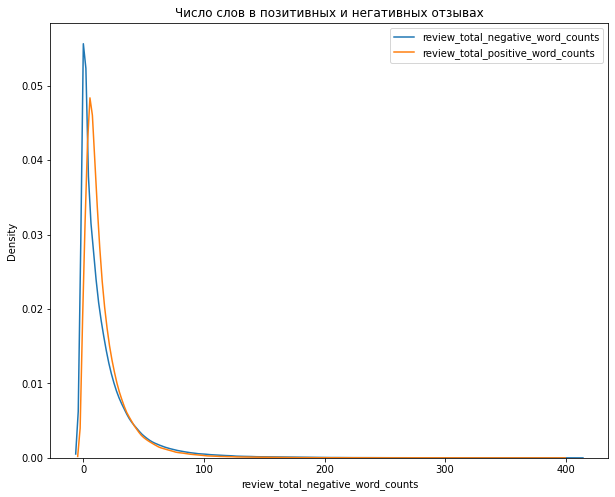

In [76]:
# два признака: число слов в позитивных и негативных отзывах
fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8)) # рисуем график 
ax1.set_title('Число слов в позитивных и негативных отзывах')

sns.kdeplot(data['review_total_negative_word_counts'], ax=ax1, label ='review_total_negative_word_counts')
sns.kdeplot(data['review_total_positive_word_counts'], ax=ax1, label ='review_total_positive_word_counts')
plt.legend()

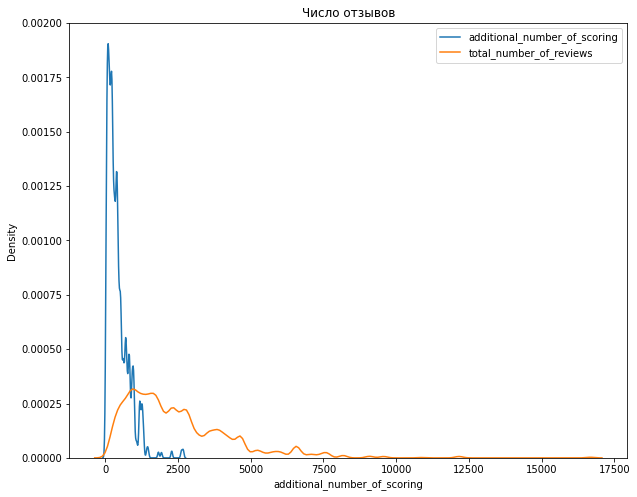

In [77]:
# признаки: числов оценок без проверки и общее число отзывов
fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Число отзывов')

# kdeplot() (KDE – оценка плотности ядра) – специальный метод для графиков распределений
sns.kdeplot(data['additional_number_of_scoring'], ax=ax1, label ='additional_number_of_scoring')
sns.kdeplot(data['total_number_of_reviews'], ax=ax1, label ='total_number_of_reviews')
plt.legend()

Мы приходим к неутешительному выводу, что по крайней мере часть данных распределены ненормально. Необходимо прибегнуть к нормализации.

In [78]:
# создадим список с числовыми признаками
cols = [
    'days_since_review', 'additional_number_of_scoring', 'average_score',
    'review_total_negative_word_counts', 'review_total_positive_word_counts',
    'total_number_of_reviews', 'total_number_of_reviews_reviewer_has_given',
    'nights_stayed'
]
data[cols].describe()

,days_since_review,additional_number_of_scoring,average_score,review_total_negative_word_counts,review_total_positive_word_counts,total_number_of_reviews,total_number_of_reviews_reviewer_has_given,nights_stayed
count,491005.000000,491005.000000,491005.000000,491005.000000,491005.000000,491005.000000,491005.000000,491005.000000
mean,354.039177,427.630863,8.410528,18.403523,17.932993,2452.424678,7.224988,2.314154
std,208.960245,374.382537,0.541880,29.561088,21.956357,1839.999997,11.031242,1.621903
min,0.000000,1.000000,5.200000,0.000000,0.000000,43.000000,1.000000,0.000000
25%,174.000000,161.000000,8.100000,0.000000,5.000000,1116.000000,1.000000,1.000000
50%,352.000000,323.000000,8.400000,9.000000,11.000000,1994.000000,3.000000,2.000000
75%,527.000000,581.000000,8.800000,23.000000,23.000000,3308.000000,8.000000,3.000000
max,730.000000,2682.000000,9.800000,408.000000,395.000000,16670.000000,315.000000,35.000000


Опытным путем выясняем, что для нормализации здесь больше подходт RobustScaler.

In [79]:
from sklearn import preprocessing
r_scaler = preprocessing.RobustScaler()
data[cols] = r_scaler.fit_transform(data[cols]) # проводим нормализацию

Также проведем стандартизацию.

In [80]:
s_scaler = preprocessing.StandardScaler()

# кодируем исходный датасет
data[cols] = s_scaler.fit_transform(data[cols])

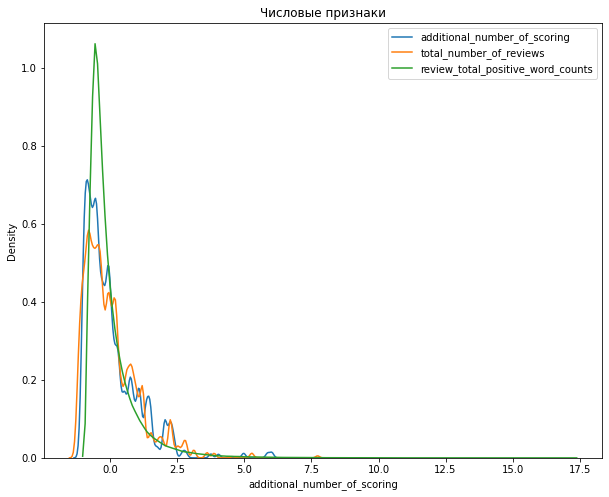

In [81]:
# посмотрим, как теперь выглядят некоторые признаки
fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Числовые признаки')

# kdeplot() (KDE – оценка плотности ядра) – специальный метод для графиков распределений
sns.kdeplot(data['additional_number_of_scoring'], ax=ax1, label ='additional_number_of_scoring')
sns.kdeplot(data['total_number_of_reviews'], ax=ax1, label ='total_number_of_reviews')
sns.kdeplot(data['review_total_positive_word_counts'], ax=ax1, label ='review_total_positive_word_counts')
plt.legend()

Стало получше. 

In [82]:
data.describe()

,additional_number_of_scoring,average_score,review_total_negative_word_counts,total_number_of_reviews,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,days_since_review,lat,lng,sample,...,good_breakfast,good_staff,leisure_trip,submitted_from_mobile,couple,solo,nights_stayed,business_trip,group,family_with_children
count,4.910050e+05,4.910050e+05,4.910050e+05,4.910050e+05,4.910050e+05,4.910050e+05,4.910050e+05,491005.000000,491005.000000,491005.000000,...,491005.000000,491005.000000,491005.000000,491005.000000,491005.000000,491005.000000,4.910050e+05,491005.000000,491005.000000,491005.000000
mean,-1.112904e-14,-8.563025e-15,2.369062e-15,7.393702e-15,-6.869285e-16,-1.037680e-14,-7.240135e-17,49.038318,2.909265,0.737406,...,0.039421,0.371526,0.810263,0.594754,0.489142,0.210878,6.075279e-15,0.160793,0.126881,0.117787
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,5.327655,4.620920,0.440044,...,0.194595,0.483213,0.392094,0.490940,0.499883,0.407932,1.000001e+00,0.367340,0.332839,0.322356
min,-1.139560e+00,-5.924804e+00,-6.225597e-01,-1.309471e+00,-8.167571e-01,-5.643058e-01,-1.694291e+00,0.000000,-0.369758,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.426815e+00,0.000000,0.000000,0.000000
25%,-7.121890e-01,-5.730576e-01,-6.225597e-01,-7.263185e-01,-5.890324e-01,-5.643058e-01,-8.615962e-01,48.208563,-0.142448,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-8.102548e-01,0.000000,0.000000,0.000000
50%,-2.794761e-01,-1.942868e-02,-3.181051e-01,-2.491441e-01,-3.157627e-01,-3.830024e-01,-9.758693e-03,51.499026,2.125679,1.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,-1.936946e-01,0.000000,0.000000,0.000000
75%,4.096593e-01,7.187432e-01,1.554909e-01,4.649871e-01,2.307766e-01,7.025621e-02,8.277220e-01,51.516288,4.841163,1.000000,...,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,4.228656e-01,0.000000,0.000000,0.000000
max,6.021572e+00,2.564173e+00,1.317938e+01,7.726951e+00,1.717349e+01,2.790033e+01,1.799200e+00,52.400181,16.429233,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.015279e+01,1.000000,1.000000,1.000000


In [83]:
data.drop('tag_num', axis=1, inplace=True) # избавимся от ненужного признака

In [84]:
data.nunique(dropna=False)

hotel_address                   1493
additional_number_of_scoring     480
review_date                      731
average_score                     34
hotel_name                      1492
                                ... 
solo                               2
nights_stayed                     33
business_trip                      2
group                              2
family_with_children               2
Length: 73, dtype: int64

# Корреляция признаков

Посмотрим теперь на корреляцию признаков. 

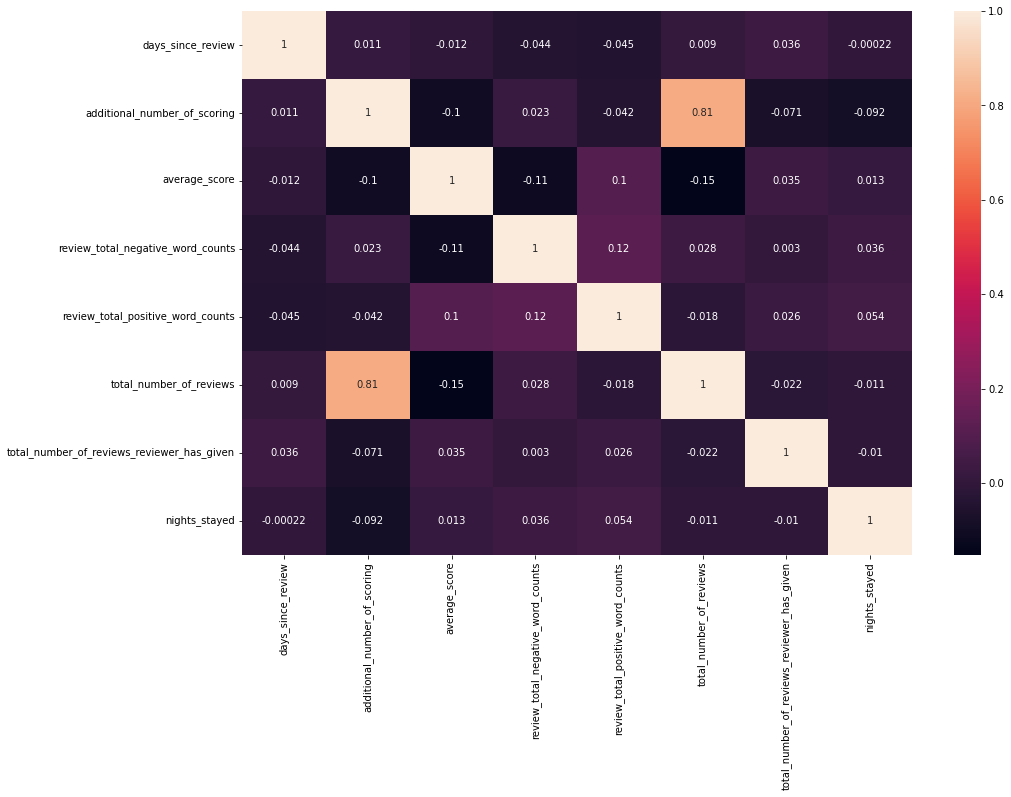

In [85]:
plt.rcParams['figure.figsize'] = (15,10) # Для числовых признаков используем Пирсона
df = data[cols]
sns.heatmap(df.corr(), annot=True);

Мы наблюдаем высокую корреляцию между признаками "число оценок без проверки" и "общее число отзывов". Отбросим первый из них.

In [86]:
data.drop(['additional_number_of_scoring'], axis=1, inplace=True)

Для категориальных признаков будем использовать Спирмана. Их очень много, поэтому будем работать поэтапно.

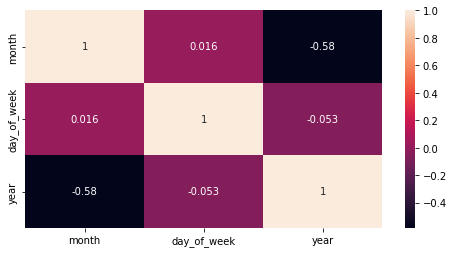

In [87]:
# посмотрим на корреляцию признаков, указывающих на время
cols_2 = ['month', 'day_of_week', 'year']
plt.rcParams['figure.figsize'] = (8, 4)
df = data[cols_2]
sns.heatmap(df.corr(method='spearman'), annot=True);

Высокой корреляции не наблюдается, идем дальше - признаки стран и городов (здесь точно что-то придется удалять).

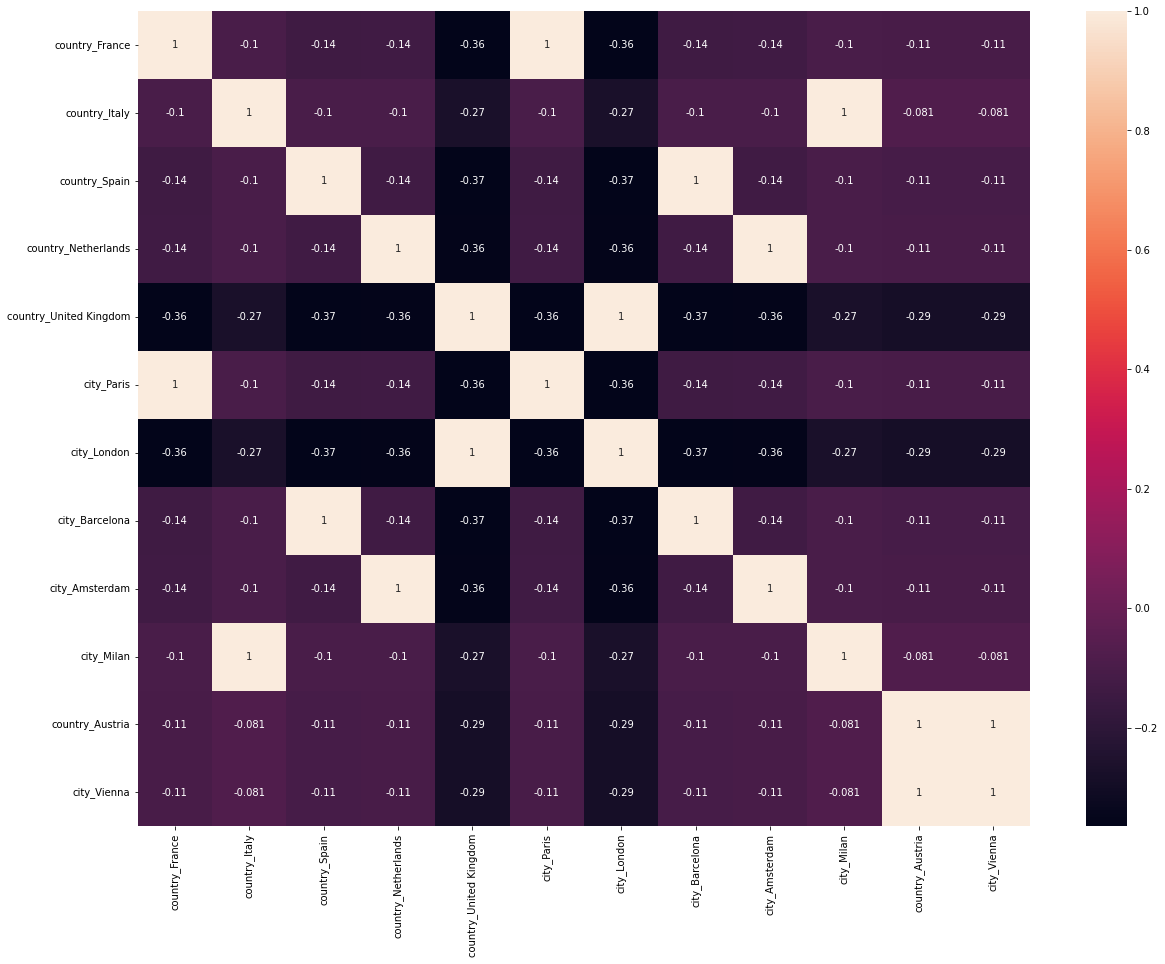

In [88]:
cols_3 = [
    'country_France', 'country_Italy', 'country_Spain', 'country_Netherlands', 'country_United Kingdom',
    'city_Paris', 'city_London', 'city_Barcelona', 'city_Amsterdam', 'city_Milan', 'country_Austria',
    'city_Vienna'
]
plt.rcParams['figure.figsize'] = (20,15)
df = data[cols_3]
sns.heatmap(df.corr(method='spearman'), annot=True);

Разумеется, нам нужно удалить часть столбцов (удалим страны, оставим города).

In [89]:
data.drop([
    'country_France', 'country_Italy', 'country_Spain', 
    'country_United Kingdom', 'country_Austria', 'country_Netherlands'
], axis=1, inplace=True)

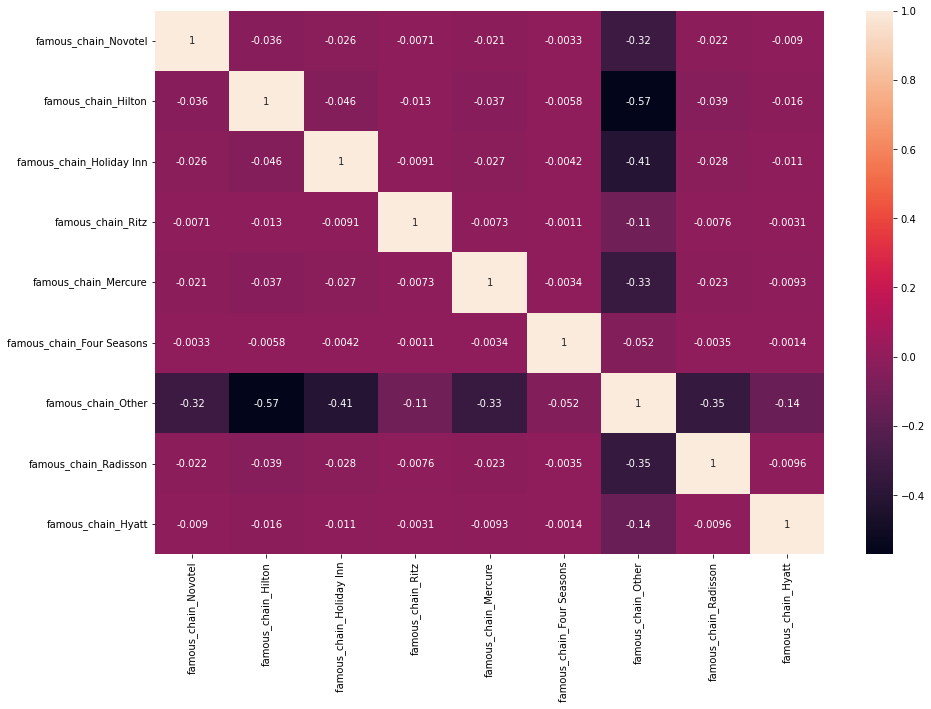

In [90]:
# теперь посмотрим на названия сетевых отелей
cols_4 = [
    'famous_chain_Novotel', 'famous_chain_Hilton', 'famous_chain_Holiday Inn', 
    'famous_chain_Ritz', 'famous_chain_Mercure', 'famous_chain_Four Seasons', 
    'famous_chain_Other', 'famous_chain_Radisson', 'famous_chain_Hyatt']
plt.rcParams['figure.figsize'] = (15,10)
df = data[cols_4]
sns.heatmap(df.corr(method='spearman'), annot=True);

Отели пока оставляем. Посмотрим на оставшиеся признаки.

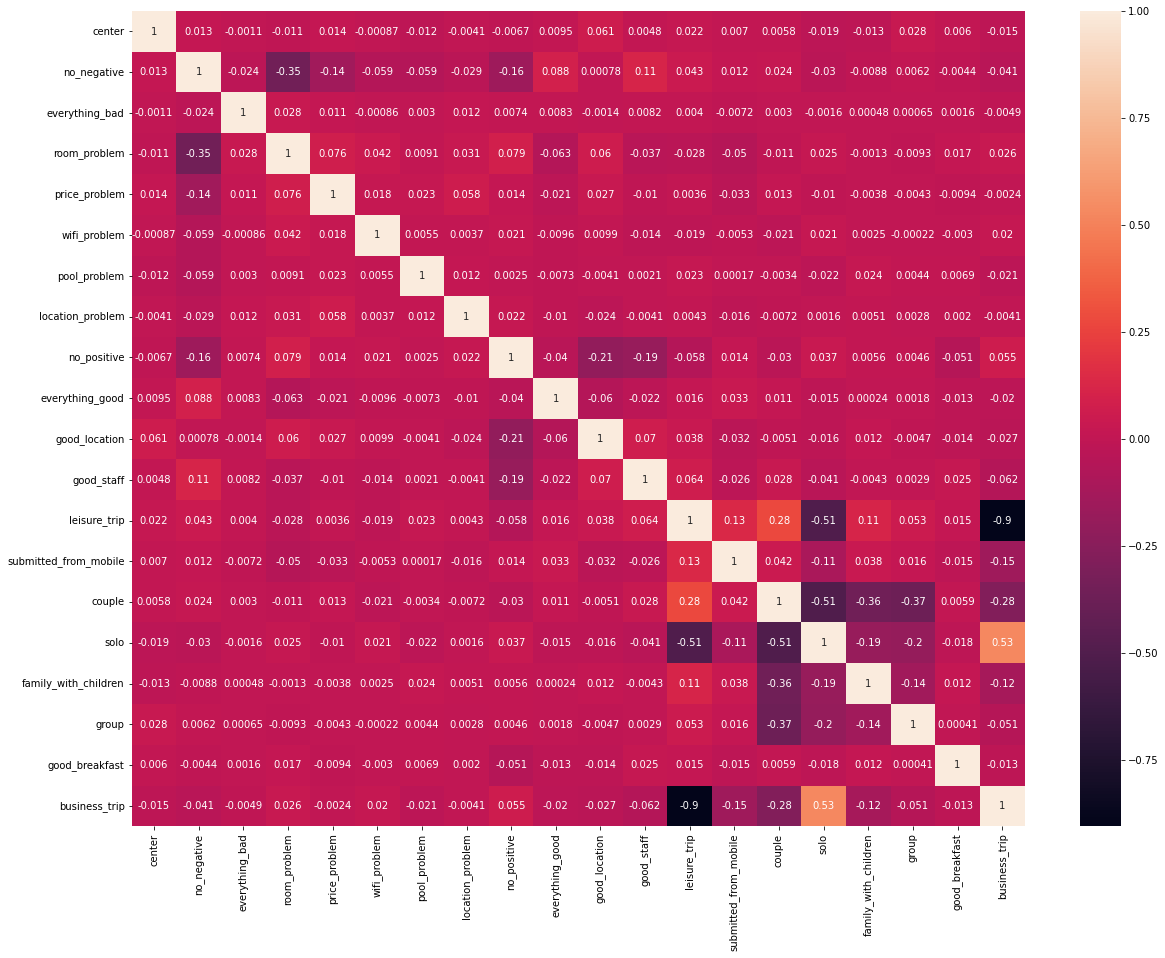

In [91]:
# делаем список остальных признаков
cols_5 = [
    'center', 'no_negative', 'everything_bad', 'room_problem', 'price_problem',
    'wifi_problem', 'pool_problem', 'location_problem', 'no_positive', 
    'everything_good', 'good_location', 'good_staff', 'leisure_trip', 
    'submitted_from_mobile', 'couple', 'solo', 'family_with_children',
    'group', 'good_breakfast', 'business_trip'
]
plt.rcParams['figure.figsize'] = (20,15)
df = data[cols_5]
sns.heatmap(df.corr(method='spearman'), annot=True);

Итак, мы наблюдаем обратную корреляцию между признаками "турпоездка" и "бизнес-поездка". Избавляемся от лишнего.

In [92]:
data.drop(['business_trip'], axis=1, inplace=True)

In [93]:
# убираем признаки, которые еще не успели обработать, 
# модель на признаках с dtypes "object" обучаться не будет, просто выберем их и удалим
object_columns = [s for s in data.columns if data[s].dtypes == 'object']
data.drop(object_columns, axis=1, inplace=True)
data.drop('review_date', axis=1, inplace=True)

# Отбор значимых признаков и обучение модели

In [94]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491005 entries, 0 to 491004
Data columns (total 58 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   average_score                               491005 non-null  float64
 1   review_total_negative_word_counts           491005 non-null  float64
 2   total_number_of_reviews                     491005 non-null  float64
 3   review_total_positive_word_counts           491005 non-null  float64
 4   total_number_of_reviews_reviewer_has_given  491005 non-null  float64
 5   days_since_review                           491005 non-null  float64
 6   lat                                         491005 non-null  float64
 7   lng                                         491005 non-null  float64
 8   sample                                      491005 non-null  int64  
 9   reviewer_score                              491005 non-null  float64
 

In [95]:
# Теперь выделим тестовую часть
train_data = data.query('sample == 1').drop(['sample'], axis=1)
test_data = data.query('sample == 0').drop(['sample'], axis=1)

y = train_data.reviewer_score.values            # наш таргет
X = train_data.drop(['reviewer_score'], axis=1)

Проведем тесты, чтобы определить, какие признаки являются важными в обучении модели.

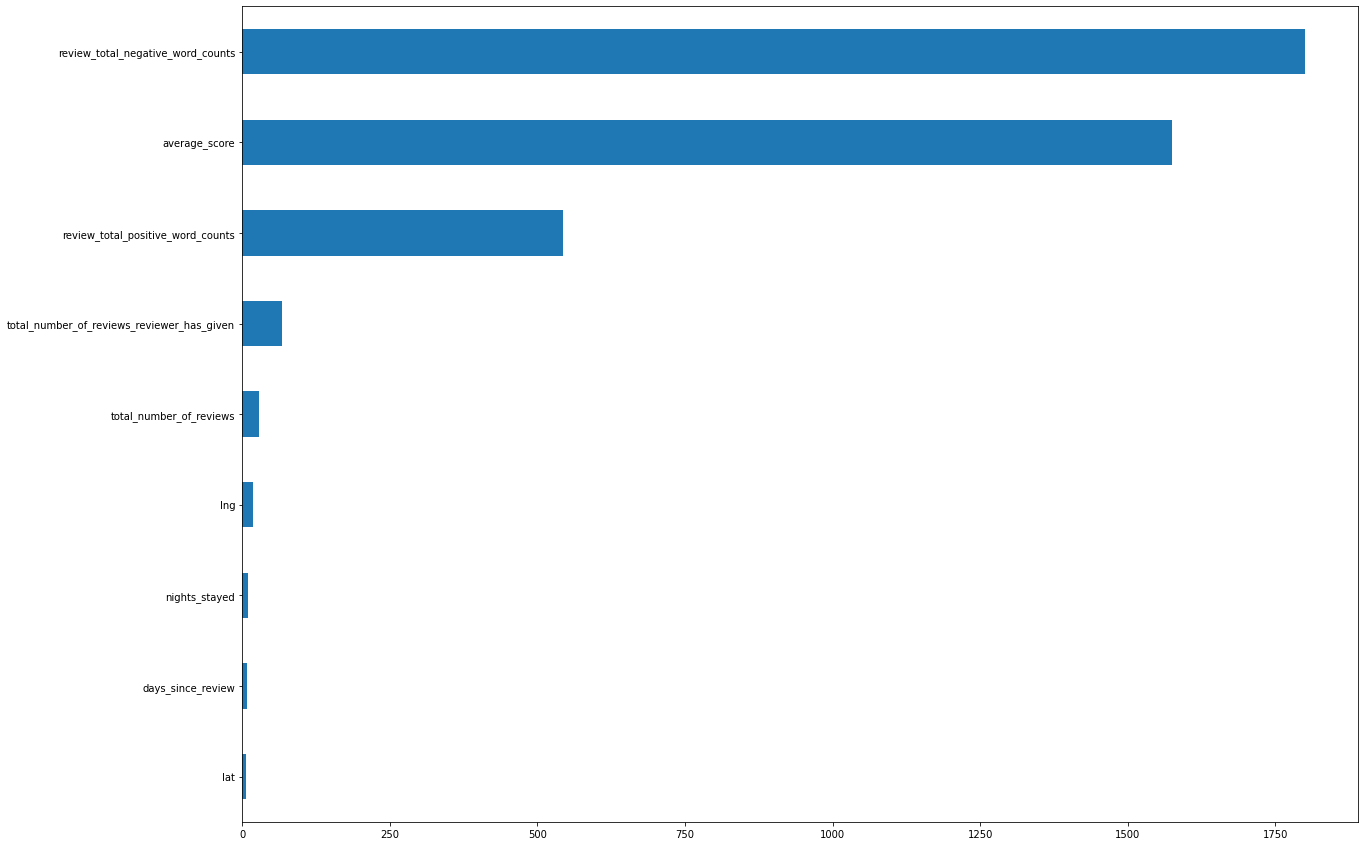

In [96]:
# проанализируем важность непрерывных признаков
num_cols = [
    'total_number_of_reviews', 'review_total_negative_word_counts', 'review_total_positive_word_counts',
    'total_number_of_reviews_reviewer_has_given', 'days_since_review', 'lat', 'lng', 'nights_stayed','average_score'
]

from sklearn.feature_selection import f_classif # проведем тест anova

imp_num = pd.Series(f_classif(X[num_cols], y)[0], index = num_cols)
imp_num.sort_values(inplace = True)
imp_num.plot(kind = 'barh');

Уберем малозначимые признаки.

In [97]:
data.drop(['days_since_review', 'lat', 'nights_stayed'], axis=1, inplace=True)

Теперь работаем с категориальными признаками. Их много. 

<AxesSubplot:>

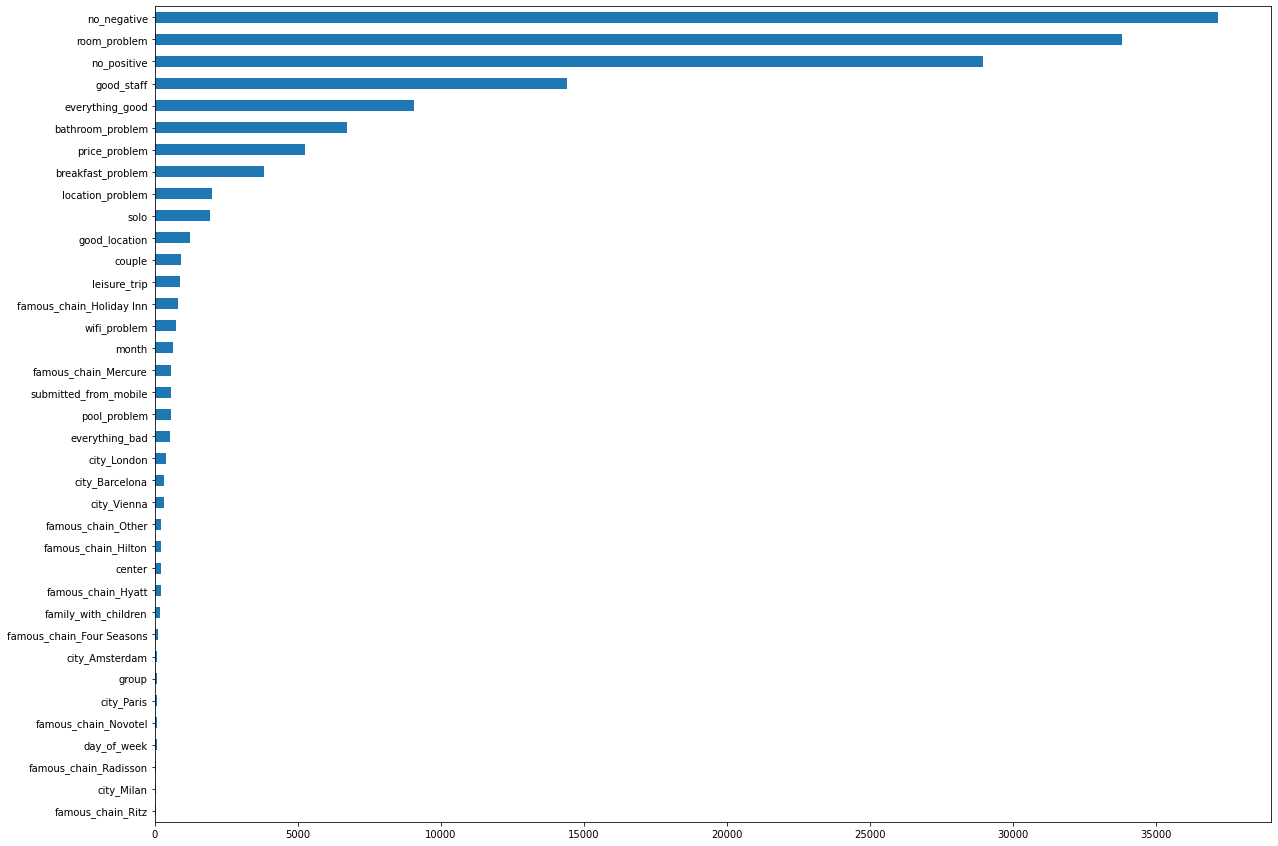

In [98]:
# составляем список категориальных признаков
y=y.astype('int')
cat_cols = [
    'month', 'day_of_week', 'city_Paris', 'city_Barcelona', 'city_Amsterdam', 'city_London', 'city_Vienna', 
    'city_Milan', 'center', 'famous_chain_Ritz', 'famous_chain_Mercure', 'famous_chain_Novotel', 
    'famous_chain_Four Seasons', 'famous_chain_Other', 'famous_chain_Radisson', 'famous_chain_Hyatt', 'no_negative', 
    'everything_bad', 'room_problem', 'price_problem','wifi_problem', 'pool_problem', 'location_problem', 'no_positive', 
    'everything_good', 'good_location', 'good_staff', 'leisure_trip', 'submitted_from_mobile', 'couple', 'solo', 'group', 
    'family_with_children', 'famous_chain_Hilton', 'famous_chain_Holiday Inn', 'bathroom_problem', 'breakfast_problem'
]
from sklearn.feature_selection import chi2 # используем хи-квадрат

imp_cat = pd.Series(chi2(X[cat_cols], y)[0], index=cat_cols)
imp_cat.sort_values(inplace = True)
imp_cat.plot(kind = 'barh')

Судя по всему, почти не играют роли признаки принадлежности отелей известным сетям (кроме некоторых), города (также за некоторыми исключениями), день недели, поездка в группе, поездка с детьми, расположение отеля в центре.

In [99]:
data.drop([
    'day_of_week', 'city_Paris', 'city_Amsterdam', 'city_Milan', 
    'famous_chain_Other', 'famous_chain_Hilton', 'center',
    'group', 'family_with_children', 'famous_chain_Ritz', 
    'famous_chain_Novotel', 'famous_chain_Four Seasons', 
    'famous_chain_Other', 'famous_chain_Radisson'
], axis=1, inplace=True)

Повторно разделим датафрейм.

In [100]:
# выделим тестовую часть
train_data = data.query('sample == 1').drop(['sample'], axis=1)
test_data = data.query('sample == 0').drop(['sample'], axis=1)

y = train_data.reviewer_score.values            # наш таргет
X = train_data.drop(['reviewer_score'], axis=1)

In [101]:
# Воспользуемся специальной функцие train_test_split для разбивки тестовых данных
# выделим 20% данных на валидацию (параметр test_size)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

In [102]:
# проверяем
test_data.shape, train_data.shape, X.shape, X_train.shape, X_test.shape

((128935, 41), (362070, 41), (362070, 40), (289656, 40), (72414, 40))

In [103]:
# Импортируем необходимые библиотеки:
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели

In [104]:
# Создаём модель (НАСТРОЙКИ НЕ ТРОГАЕМ)
model = RandomForestRegressor(n_estimators=100, verbose=1, n_jobs=-1, random_state=RANDOM_SEED)

In [105]:
# Обучаем модель на тестовом наборе данных
model.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = model.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   54.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  2.0min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.8s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    1.7s finished


In [106]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
print('MAPE:', metrics.mean_absolute_error(y_test, y_pred))

MAPE: 0.890931497493907


<AxesSubplot:>

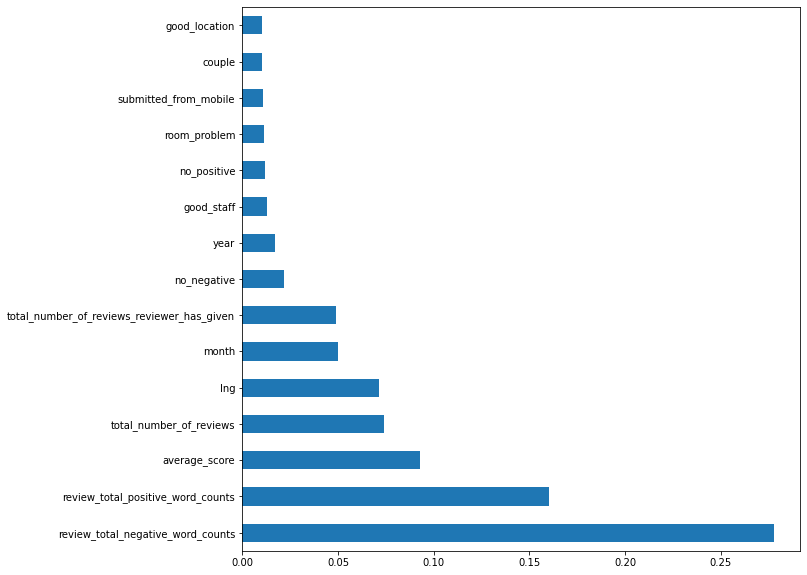

In [107]:
# в RandomForestRegressor есть возможность вывести самые важные признаки для модели
plt.rcParams['figure.figsize'] = (10,10)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')

In [108]:
test_data.sample(10)

,average_score,review_total_negative_word_counts,total_number_of_reviews,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,lng,reviewer_score,city_Barcelona,city_London,city_Vienna,...,price_problem,no_positive,good_location,everything_good,good_breakfast,good_staff,leisure_trip,submitted_from_mobile,couple,solo
7999,0.349657,-0.453418,-1.169254,0.595136,-0.564306,2.179107,0.0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
111098,0.165114,-0.047479,-0.037731,-0.452398,3.243066,2.146426,0.0,1,0,0,...,0,0,1,0,0,0,1,0,1,0
104818,-1.126687,-0.622560,-0.035557,-0.634577,2.155246,9.195273,0.0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
72914,-2.603030,-0.081307,-0.212731,-0.725667,-0.473654,-0.148942,0.0,0,1,0,...,0,1,0,0,0,0,0,1,0,1
123169,-0.203972,-0.453418,-0.315992,-0.224673,-0.564306,-0.144462,0.0,0,1,0,...,0,0,0,0,0,1,1,1,1,0
28265,-2.418487,-0.182792,3.605208,-0.816757,-0.292351,-0.023221,0.0,0,1,0,...,0,1,0,0,0,0,1,0,1,0
33527,-0.203972,-0.487247,-0.597514,-0.179128,0.432863,2.345075,0.0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
115109,-0.757601,-0.453418,0.339987,0.686226,-0.201699,16.383377,0.0,0,0,1,...,0,0,1,0,0,0,1,0,1,0
12503,-0.019429,0.561430,1.199770,-0.133583,-0.564306,-0.191758,0.0,0,1,0,...,0,0,0,0,0,1,1,1,0,0
55391,0.903286,-0.453418,-0.670884,-0.543487,0.614166,16.344016,0.0,0,0,1,...,1,0,0,0,0,1,0,0,1,0


In [109]:
test_data = test_data.drop(['reviewer_score'], axis=1)

In [110]:
sample_submission

,reviewer_score,id
0,1,488440
1,10,274649
2,3,374688
3,10,404352
4,9,451596
...,...,...
128930,7,495812
128931,1,315577
128932,3,511968
128933,6,303386


In [111]:
predict_submission = model.predict(test_data)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    1.2s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    2.7s finished


In [112]:
predict_submission

array([8.674, 7.105, 8.202, ..., 8.294, 9.532, 6.95 ])

In [113]:
list(sample_submission)

['reviewer_score', 'id']

In [114]:
sample_submission['reviewer_score'] = predict_submission
sample_submission.to_csv('submission.csv', index=False)
sample_submission.head(10)

,reviewer_score,id
0,8.674,488440
1,7.105,274649
2,8.202,374688
3,9.827,404352
4,9.364,451596
5,8.251,302161
6,7.998,317079
7,6.725,13963
8,8.306,159785
9,8.052,195089
